## EDA for Crop Yeild Data

In [1]:
import pandas as pd

In [2]:
import matplotlib as mp

### Importing Data

In [3]:
df = pd.read_excel('YeildDataIndia.xlsx')
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Rainfall Per Year
0,India,Cassava,1990,205381,1083,75000.0,25.58,58114.6
1,India,Cassava,1990,205381,1083,75000.0,26.88,58114.6
2,India,Cassava,1990,205381,1083,75000.0,25.79,58114.6
3,India,Cassava,1990,205381,1083,75000.0,24.10,58114.6
4,India,Cassava,1990,205381,1083,75000.0,25.25,58114.6


In [17]:
df.drop_duplicates( inplace=True)
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Rainfall Per Year,KG/HA
0,India,Cassava,1990,205381,1083,75000.0,25.58,58114.6,20538
1,India,Cassava,1990,205381,1083,75000.0,26.88,58114.6,20538
2,India,Cassava,1990,205381,1083,75000.0,25.79,58114.6,20538
3,India,Cassava,1990,205381,1083,75000.0,24.10,58114.6,20538
4,India,Cassava,1990,205381,1083,75000.0,25.25,58114.6,20538


In [5]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
Index: 3384 entries, 0 to 4047
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           3384 non-null   object 
 1   Item                           3384 non-null   object 
 2   Year                           3384 non-null   int64  
 3   hg/ha_yield                    3384 non-null   int64  
 4   average_rain_fall_mm_per_year  3384 non-null   int64  
 5   pesticides_tonnes              3384 non-null   float64
 6   avg_temp                       3384 non-null   float64
 7   Rainfall Per Year              3384 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 237.9+ KB


### Adding KG/HA (Kilogrma per hactare) column

I'm addin this column to the dataset for simplicity

In [18]:
df['KG/HA'] = (df['hg/ha_yield']//10)
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Rainfall Per Year,KG/HA
0,India,Cassava,1990,205381,1083,75000.0,25.58,58114.6,20538
1,India,Cassava,1990,205381,1083,75000.0,26.88,58114.6,20538
2,India,Cassava,1990,205381,1083,75000.0,25.79,58114.6,20538
3,India,Cassava,1990,205381,1083,75000.0,24.10,58114.6,20538
4,India,Cassava,1990,205381,1083,75000.0,25.25,58114.6,20538


### Statistical summary of the data

In [7]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Rainfall Per Year,KG/HA
count,3384.000000,3384.000000,3384.0,3384.000000,3384.000000,3384.000000,3384.000000
mean,2001.529551,81034.148345,1083.0,48378.848463,26.053924,50069.243262,8102.984634
std,7.084037,96177.877072,0.0,15038.831372,0.866459,4134.202123,9617.788885
min,1990.000000,6553.000000,1083.0,14485.330000,23.260000,41357.900000,655.000000
25%,1995.000000,13704.750000,1083.0,37423.000000,25.500000,46897.300000,1370.250000
50%,2001.000000,28124.000000,1083.0,46195.000000,25.990000,50407.900000,2812.000000
75%,2008.000000,112471.000000,1083.0,61257.000000,26.670000,53106.200000,11246.500000
max,2013.000000,385818.000000,1083.0,75000.000000,28.850000,58114.600000,38581.000000


### Extracting the rainfall and the yeild data of wheat and maize for visualisation

In [8]:
wheatData = df[df['Item']=='Wheat'][['Year', 'Rainfall Per Year' , 'KG/HA', ]]
maizeData = df[df['Item']=='Maize'][['Year', 'Rainfall Per Year' , 'KG/HA', ]]
wheatData.drop_duplicates(inplace=True)
maizeData.drop_duplicates(inplace=True)

In [9]:
maizeData.head()

,Year,Rainfall Per Year,KG/HA
22,1990,58114.6,1517
198,1991,50407.9,1376
374,1992,47706.7,1675
550,1993,51514.3,1601
726,1994,54246.3,1448


In [10]:
wheatData.head()

,Year,Rainfall Per Year,KG/HA
154,1990,58114.6,2121
330,1991,50407.9,2281
506,1992,47706.7,2394
682,1993,51514.3,2326
858,1994,54246.3,2379


### Rainfall Vs Yeild of Wheat per Hactare

<Axes: xlabel='Rainfall Per Year', ylabel='KG/HA'>

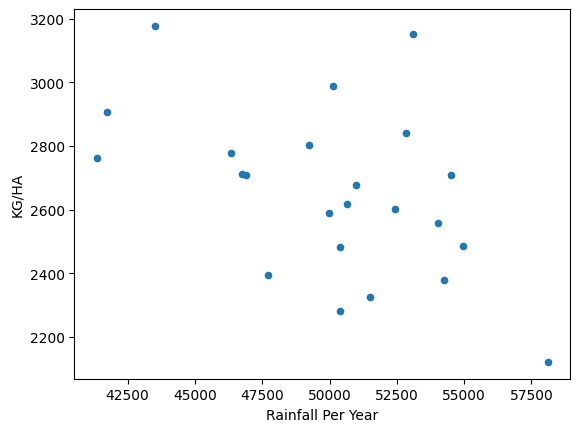

In [11]:
wheatData.plot(x='Rainfall Per Year', y='KG/HA', kind='scatter')

In [12]:
wheatData.corr(method='pearson')['Rainfall Per Year']['KG/HA']

-0.48267738071055044

### Rainfall Vs Yeild of Maize per Hactare

<Axes: xlabel='Rainfall Per Year', ylabel='KG/HA'>

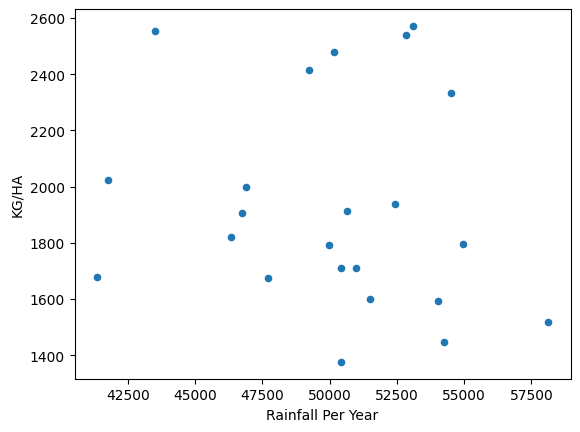

In [13]:
maizeData.plot(x='Rainfall Per Year', y='KG/HA', kind='scatter')

In [14]:
maizeData.corr(method='pearson')['Rainfall Per Year']['KG/HA']

-0.1422144439868826

<Axes: xlabel='Year'>

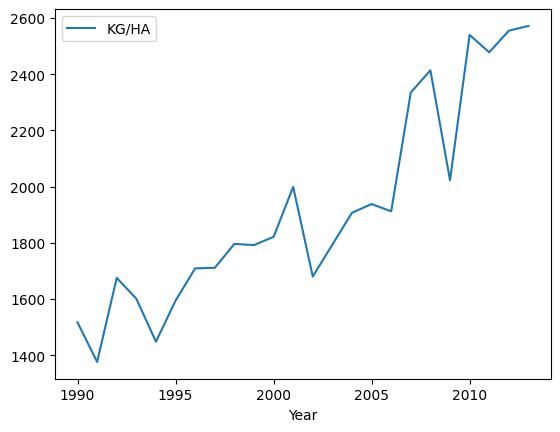

In [15]:
maizeData.plot(x='Year', y='KG/HA', kind='line')

<Axes: xlabel='Year'>

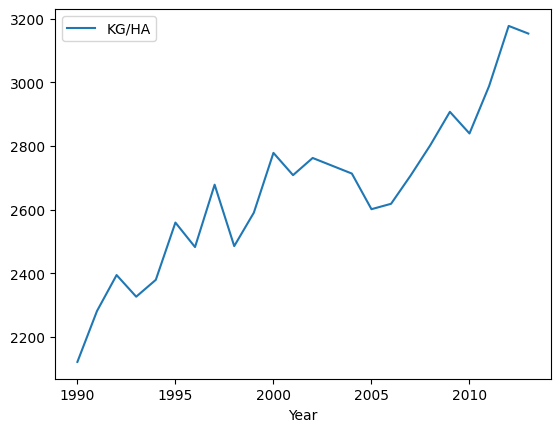

In [16]:
wheatData.plot(x='Year', y='KG/HA', kind='line')